## Investigating propagation of errors

This notebook was made to investigate the propagation of errors formula.
We imagine that we have a function $q(x,y)$ and we want to propagate the
uncertainty on $x$ and $y$ (denoted $\sigma_x$ and $\sigma_y$, respectively) through to the quantity $q$.

The most straight forward way to do this is just randomly sample $x$ and $y$, evaluate $q$ and look at it's distribution. This is really the definition of what we mean by propagation of uncertianty. It's very easy to do with some simply python code.

The calculus formula for the propagation of errors is really an approximation. This is the formula for a general $q(x,y)$
\begin{equation}
\sigma_q^2 = \left( \frac{\partial q}{\partial x} \sigma_x \right)^2 + \left( \frac{\partial q}{\partial y}\sigma_y \right)^2
\end{equation}

In the special case of addition  $q(x,y) = x\pm y$ we have $\sigma_q^2 = \sigma_x^2 + \sigma_y^2$.

In the special case of multiplication $q(x,y) = x y$ and division $q(x,y) = x / y$ we have $(\sigma_q/q)^2 = (\sigma_x/x)^2 + (\sigma_y/y)^2$, which we can rewrite as $\sigma_q = (x/y) \sqrt{(\sigma_x/x)^2 + (\sigma_y/y)^2}$

Let's try out these formulas and compare the direct approach of making the distribution to the prediction from these formulas

In [1]:
%pylab inline --no-import-all

Populating the interactive namespace from numpy and matplotlib


//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
from ipywidgets import widgets  
from ipywidgets import interact, interactive, fixed

In [3]:
mean_x = .8
std_x = .15
mean_y = 3.
std_y = .9
N = 1000
x = np.random.normal(mean_x, std_x, N)
y = np.random.normal(mean_y, std_y, N)

## Single variable example: division

As a warm up, let's consider $q(x) = 1/x$

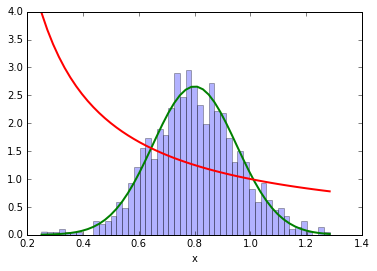

In [4]:
counts, bins, patches = plt.hist(x, bins=50, normed=True, alpha=0.3)
gaus_x = mlab.normpdf(bins, mean_x,std_x)

q_for_plot = 1./bins

plt.plot(bins, gaus_x, lw=2)
plt.plot(bins, q_for_plot, lw=2)

plt.xlabel('x')

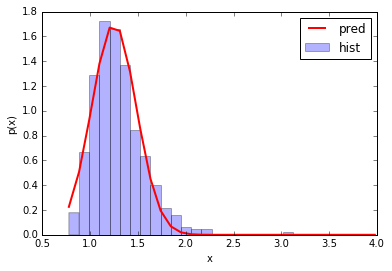

In [5]:
q_of_x = 1./x

pred_mean_q = 1./mean_x
pred_std_q = np.sqrt((std_x/mean_x)**2)/mean_x

counts, bins, patches = plt.hist(q_of_x, bins=30, normed=True, alpha=0.3)

plt.plot(bins, mlab.normpdf(bins, pred_mean_q, pred_std_q), c='r', lw=2)
plt.legend(('pred','hist'))
plt.xlabel('x')
plt.ylabel('p(x)')

### Now let's do the same thing with an interactive widget!

In [6]:
def plot_1_over_x(mean_x, std_x, N):
    x = np.random.normal(mean_x, std_x, N)

    q_of_x = 1./x

    pred_mean_q = 1./mean_x
    pred_std_q = np.sqrt((std_x/mean_x)**2)/mean_x

    counts, bins, patches = plt.hist(q_of_x, 
                                     bins=np.linspace(pred_mean_q-3*pred_std_q,pred_mean_q+3*pred_std_q,30), 
                                     normed=True, alpha=0.3)

    plt.plot(bins, mlab.normpdf(bins, pred_mean_q, pred_std_q), c='r', lw=2)
    plt.legend(('pred','hist'))
    plt.xlabel('x')
    plt.ylabel('p(x)')

<function __main__.plot_1_over_x>

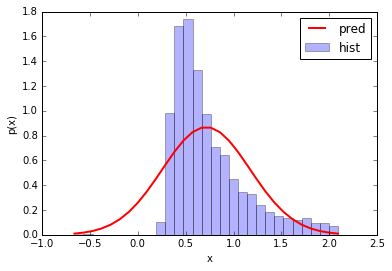

In [7]:
# now make the interactive widget
interact(plot_1_over_x,mean_x=(0.,3.,.1), std_x=(.0, 2., .1), N=(0,10000,1000))

### Check propagation of errors under addition 

<function __main__.plot_x_plus_y>

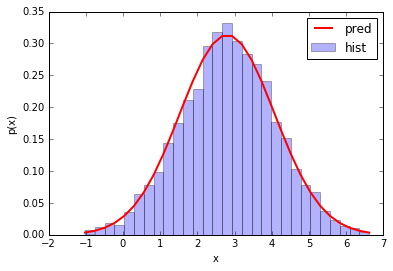

In [8]:
def plot_x_plus_y(mean_x, std_x, mean_y, std_y, N):
    x = np.random.normal(mean_x, std_x, N)
    y = np.random.normal(mean_y, std_y, N)

    q_of_x_y = x+y

    pred_mean_q = mean_x+mean_y
    pred_std_q = np.sqrt(std_x**2+std_y**2)

    counts, bins, patches = plt.hist(q_of_x_y, 
                                     bins=np.linspace(pred_mean_q-3*pred_std_q,pred_mean_q+3*pred_std_q,30), 
                                     normed=True, alpha=0.3)

    plt.plot(bins, mlab.normpdf(bins, pred_mean_q, pred_std_q), c='r', lw=2)
    plt.legend(('pred','hist'))
    plt.xlabel('x')
    plt.ylabel('p(x)')


# now make the interactive widget
interact(plot_x_plus_y,
         mean_x=(0.,3.,.1), std_x=(.0, 2., .1), 
         mean_y=(0.,3.,.1), std_y=(.0, 2., .1),
         N=(0,10000,1000))

### Check propagation of errors under addition 

<function __main__.plot_x_plus_y>

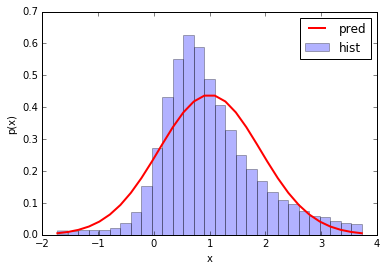

In [9]:
def plot_x_plus_y(mean_x, std_x, mean_y, std_y, N):
    x = np.random.normal(mean_x, std_x, N)
    y = np.random.normal(mean_y, std_y, N)

    q_of_x_y = x/y

    pred_mean_q = mean_x/mean_y
    pred_std_q = np.sqrt((std_x/mean_x)**2+(std_y/mean_y)**2)*mean_x/mean_y

    counts, bins, patches = plt.hist(q_of_x_y, 
                                     bins=np.linspace(pred_mean_q-3*pred_std_q,pred_mean_q+3*pred_std_q,30), 
                                     normed=True, alpha=0.3)


    plt.plot(bins, mlab.normpdf(bins, pred_mean_q, pred_std_q), c='r', lw=2)
    plt.legend(('pred','hist'))
    plt.xlabel('x')
    plt.ylabel('p(x)')



interact(plot_x_plus_y,mean_x=(0.,3.,.1), std_x=(.0, 2., .1), mean_y=(0.,3.,.1), std_y=(.0, 2., .1),N=(0,100000,1000))